## Import the packages

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

## Define the FFT function

In [12]:
def hua_fft(data,fs):
    n = len(data) # length of the signal
    k = np.arange(n)/n
    frq = fs*k # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range
    Y = np.fft.fft(data)/n # fft computing and normalization
    Y = Y[range(n//2)]
    return [frq,abs(Y)]
def FFT_sample(data,sample_freq):
    FFT=[]
    for i in range(data.shape[0]):
        fft=hua_fft(data[i,:],sample_freq)
        FFT.append(fft)
    return np.array(FFT)
def image(File_num,size,File_path,Save_path):
    P=[]
    for i in range(File_num):
        file_name=File_path+"_%d.jpg"%(i)
        pic=Image.open(file_name)
        pic=pic.resize((size,size))
        pic=np.array(pic)
        P.append(pic)        
    np.save(Save_path+"FFT.npy",P)   
def transformer(data,File_path):
    for i in range(data.shape[0]):
        plt.figure(figsize=(2, 2),dpi=300)
        plt.axis('off') 
        plt.plot(data[i,0,128:1024],data[i,1,128:1024],'r')
        plt.savefig(File_path+"_%d.jpg"%(i))
        plt.close()

## Define the dataset reading function

In [13]:
def work_data(frame_size, step, data_size, path_list,channel):
    helical1, helical2, helical3, helical4, helical5, helical6, = [], [], [], [], [], []
    spur1,spur2,spur3,spur4,spur5,spur6,spur7,spur8 = [], [], [], [], [], [] , [], []   
    work1 = np.loadtxt('./gearset/raw/' + path_list[0])[:, channel]
    work2 = np.loadtxt('./gearset/raw/' + path_list[1])[:, channel]
    work3 = np.loadtxt('./gearset/raw/' + path_list[2])[:, channel]
    work4 = np.loadtxt('./gearset/raw/' + path_list[3])[:, channel]
    work5 = np.loadtxt('./gearset/raw/' + path_list[4])[:, channel]
    work6 = np.loadtxt('./gearset/raw/' + path_list[5])[:, channel]
    work7 = np.loadtxt('./gearset/raw/' + path_list[6])[:, channel]
    work8 = np.loadtxt('./gearset/raw/' + path_list[7])[:, channel]
    work9 = np.loadtxt('./gearset/raw/' + path_list[8])[:, channel]
    work10 = np.loadtxt('./gearset/raw/' + path_list[9])[:, channel]
    work11 = np.loadtxt('./gearset/raw/' + path_list[10])[:, channel]
    work12 = np.loadtxt('./gearset/raw/' + path_list[11])[:, channel]
    work13 = np.loadtxt('./gearset/raw/' + path_list[12])[:, channel]
    work14 = np.loadtxt('./gearset/raw/' + path_list[13])[:, channel]
    for i in range(data_size):
        helical1.append(work1[i * step: i * step + frame_size].tolist())
        helical2.append(work2[i * step: i * step + frame_size].tolist())
        helical3.append(work3[i * step: i * step + frame_size].tolist())
        helical4.append(work4[i * step: i * step + frame_size].tolist())
        helical5.append(work5[i * step: i * step + frame_size].tolist())
        helical6.append(work6[i * step: i * step + frame_size].tolist())
        spur1.append(work7[i * step: i * step + frame_size].tolist())
        spur2.append(work8[i * step: i * step + frame_size].tolist())
        spur3.append(work9[i * step: i * step + frame_size].tolist())
        spur4.append(work10[i * step: i * step + frame_size].tolist())
        spur5.append(work11[i * step: i * step + frame_size].tolist())
        spur6.append(work12[i * step: i * step + frame_size].tolist())
        spur7.append(work13[i * step: i * step + frame_size].tolist())
        spur8.append(work14[i * step: i * step + frame_size].tolist())

    data = np.concatenate((np.array(helical1), np.array(helical2), 
                           np.array(helical3), np.array(helical4), 
                           np.array(helical5), np.array(helical6),
                           np.array(spur1), np.array(spur2),
                           np.array(spur3), np.array(spur4),
                           np.array(spur5), np.array(spur6),
                           np.array(spur7), np.array(spur8)), axis=0)
    labels = np.zeros((data_size * 14, 14))
    for i in range(14):
        labels[data_size*i:data_size+i*data_size,i] = 1

    return data, labels

## Load the gear dataset

In [14]:
working_conditions = ["30hz","35hz","40hz","45hz","50hz"]
speed = ["High","Low"]
i= 4
j =2
m = 0
n = 0

source_data_path = [
    'helical 1/helical 1_'+working_conditions[i]+'_'+speed[m]+'_1.txt', 
    'helical 2/helical 2_'+working_conditions[i]+'_'+speed[m]+'_1.txt',
    'helical 3/helical 3_'+working_conditions[i]+'_'+speed[m]+'_1.txt',
    'helical 4/helical 4_'+working_conditions[i]+'_'+speed[m]+'_1.txt', 
    'helical 5/helical 5_'+working_conditions[i]+'_'+speed[m]+'_1.txt',
    'helical 6/helical 6_'+working_conditions[i]+'_'+speed[m]+'_1.txt',
    'spur 1/spur 1_'+working_conditions[i]+'_'+speed[m]+'_1.txt', 
    'spur 2/spur 2_'+working_conditions[i]+'_'+speed[m]+'_1.txt',
    'spur 3/spur 3_'+working_conditions[i]+'_'+speed[m]+'_1.txt',
    'spur 4/spur 4_'+working_conditions[i]+'_'+speed[m]+'_1.txt', 
    'spur 5/spur 5_'+working_conditions[i]+'_'+speed[m]+'_1.txt',
    'spur 6/spur 6_'+working_conditions[i]+'_'+speed[m]+'_1.txt',
    'spur 7/spur 7_'+working_conditions[i]+'_'+speed[m]+'_1.txt', 
    'spur 8/spur 8_'+working_conditions[i]+'_'+speed[m]+'_1.txt',
]

target_data_path = [
    'helical 1/helical 1_'+working_conditions[j]+'_'+speed[n]+'_1.txt', 
    'helical 2/helical 2_'+working_conditions[j]+'_'+speed[n]+'_1.txt',
    'helical 3/helical 3_'+working_conditions[j]+'_'+speed[n]+'_1.txt',
    'helical 4/helical 4_'+working_conditions[j]+'_'+speed[n]+'_1.txt', 
    'helical 5/helical 5_'+working_conditions[j]+'_'+speed[n]+'_1.txt',
    'helical 6/helical 6_'+working_conditions[j]+'_'+speed[n]+'_1.txt',
    'spur 1/spur 1_'+working_conditions[j]+'_'+speed[n]+'_1.txt', 
    'spur 2/spur 2_'+working_conditions[j]+'_'+speed[n]+'_1.txt',
    'spur 3/spur 3_'+working_conditions[j]+'_'+speed[n]+'_1.txt',
    'spur 4/spur 4_'+working_conditions[j]+'_'+speed[n]+'_1.txt', 
    'spur 5/spur 5_'+working_conditions[j]+'_'+speed[n]+'_1.txt',
    'spur 6/spur 6_'+working_conditions[j]+'_'+speed[n]+'_1.txt',
    'spur 7/spur 7_'+working_conditions[j]+'_'+speed[n]+'_1.txt', 
    'spur 8/spur 8_'+working_conditions[j]+'_'+speed[n]+'_1.txt',
]

frame_size = 6000
step = 25
data_size = 100
class_num = 6
batch_size = 128
save = True
split = 0.2
channel1 = 0
channel2 = 0
# load data
source_data, source_labels = work_data(frame_size, step, data_size, source_data_path,channel1)
target_data, target_labels = work_data(frame_size, step, data_size, target_data_path,channel2)
FFT1 = FFT_sample(source_data,60000)
FFT2 = FFT_sample(target_data,60000)

## Visualize the FFT spectrum of gear data

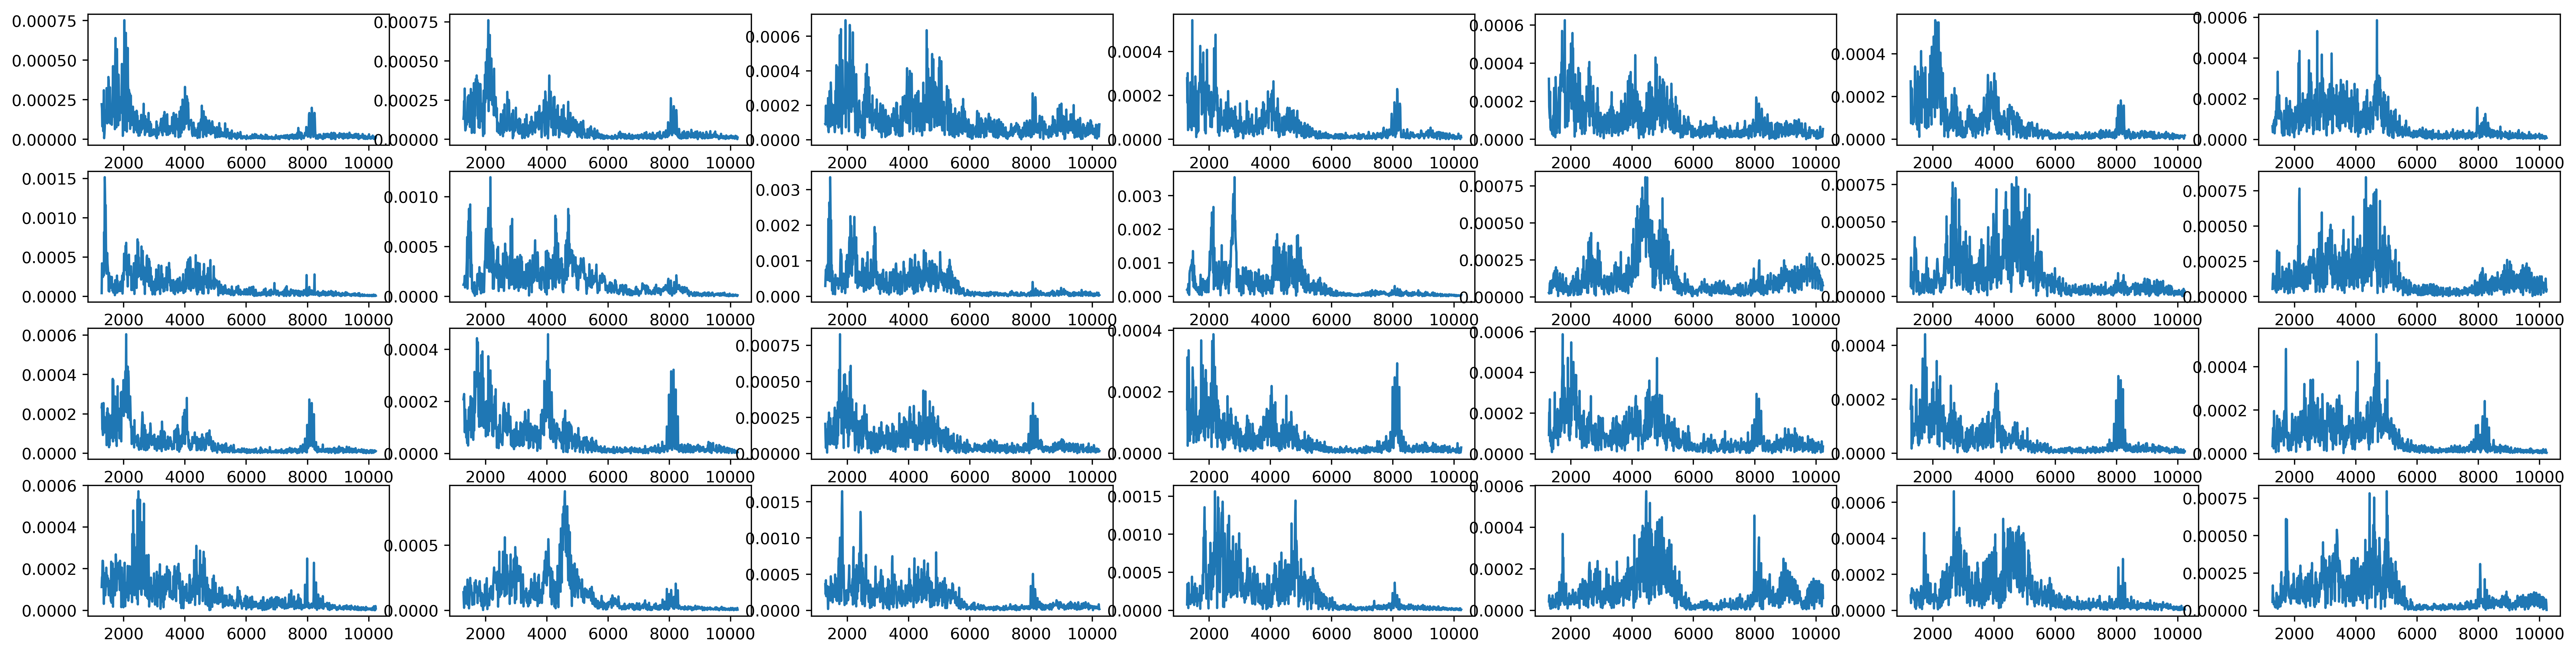

In [15]:
fig, axes = plt.subplots(4,7,figsize=(28,7),dpi=400)
start = 128
end =1024
axes[0,0].plot(FFT1[0,0,start :end],FFT1[0,1,start :end])
axes[0,1].plot(FFT1[100,0,start :end],FFT1[100,1,start :end])
axes[0,2].plot(FFT1[200,0,start :end],FFT1[200,1,start :end])
axes[0,3].plot(FFT1[300,0,start :end],FFT1[300,1,start :end])
axes[0,4].plot(FFT1[400,0,start :end],FFT1[400,1,start :end])
axes[0,5].plot(FFT1[500,0,start :end],FFT1[500,1,start :end])
axes[0,6].plot(FFT1[600,0,start :end],FFT1[600,1,start :end])



axes[1,0].plot(FFT1[700,0,start :end],FFT1[700,1,start :end])
axes[1,1].plot(FFT1[800,0,start :end],FFT1[800,1,start :end])
axes[1,2].plot(FFT1[900,0,start :end],FFT1[900,1,start :end])
axes[1,3].plot(FFT1[1000,0,start :end],FFT1[1000,1,start :end])
axes[1,4].plot(FFT1[1100,0,start :end],FFT1[1100,1,start :end])
axes[1,5].plot(FFT1[1200,0,start :end],FFT1[1200,1,start :end])
axes[1,6].plot(FFT1[1300,0,start :end],FFT1[1300,1,start :end])


axes[2,0].plot(FFT2[0,0,start :end],FFT2[0,1,start :end])
axes[2,1].plot(FFT2[100,0,start :end],FFT2[100,1,start :end])
axes[2,2].plot(FFT2[200,0,start :end],FFT2[200,1,start :end])
axes[2,3].plot(FFT2[300,0,start :end],FFT2[300,1,start :end])
axes[2,4].plot(FFT2[400,0,start :end],FFT2[400,1,start :end])
axes[2,5].plot(FFT2[500,0,start :end],FFT2[500,1,start :end])
axes[2,6].plot(FFT2[600,0,start :end],FFT2[600,1,start :end])



axes[3,0].plot(FFT2[700,0,start :end],FFT2[700,1,start :end])
axes[3,1].plot(FFT2[800,0,start :end],FFT2[800,1,start :end])
axes[3,2].plot(FFT2[900,0,start :end],FFT2[900,1,start :end])
axes[3,3].plot(FFT2[1000,0,start :end],FFT2[1000,1,start :end])
axes[3,4].plot(FFT2[1100,0,start :end],FFT2[1100,1,start :end])
axes[3,5].plot(FFT2[1200,0,start :end],FFT2[1200,1,start :end])
axes[3,6].plot(FFT2[1300,0,start :end],FFT2[1300,1,start :end])


## Save the FFT spectrum

In [16]:
File_path1 = "./gearset/data/images/source/"
transformer(FFT1,File_path1)

File_path2 = "./gearset/data/images/target/"
transformer(FFT2,File_path2)
File_num = 1400
size = 64
Save_path1 = "./gearset/data/Source_"
Save_path2 = "./gearset/data/Target_"
image(File_num,size,File_path1,Save_path1)
image(File_num,size,File_path2,Save_path2)
np.save("./gearset/data/label_image.npy",source_labels)

## Build the OSDT task

**Task-T1**


source Domain:
1,3,4

target Domain:
1,3,4,**6**

**Task-T2**


source Domain:
1,3,4

target Domain:
1,3,4,**5**,**6**

**Task-T3**


source Domain:
1,3,4

target Domain:
1,**2**,3,4,**5**,**6**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
F_0 = np.load("./gearset/data/Source_FFT.npy")
F_1 = np.load("./gearset/data/Target_FFT.npy")
X_0 = np.vstack((F_0[0:100],F_0[200:400],F_0[700:800],F_0[1000:1100],F_0[1200:1300]))
X_1 = np.vstack((F_1[0:100],F_1[200:400],F_1[700:800],F_1[1000:1100],F_1[1200:1300]

In [ ]:
def T0(X_0,X_1,out_num):
    
    if out_num == 1:
    #Transfer 1,3,4---1,3,4,6
        source = np.vstack((F_0[0:100],F_0[700:700],F_0[700:800],F_0[300:400],F_0[300:400]))
        target = np.vstack((F_1[0:100],F_1[700:800],F_1[300:400],F_1[1300:1400]))
        label_source = np.zeros((400,4))
        label_source[0:100,0] =1 
        label_source[100:200,1] =1 
        label_source[200:300,2] =1 
        label_source[300:400,2] =1
        label_target = np.zeros((400,4))
        label_target[0:100,0] =1 
        label_target[100:200,1] =1 
        label_target[200:300,2] =1 
        label_target[300:400,3] =1 
    if out_num == 2:
    #Transfer 1,3,4---1,3,4,5,6
        source = np.vstack((X_0[0:50],X_0[300:400],X_0[350:400],X_0[200:300],X_0[200:300],X_0[200:300]))
        target = np.vstack((X_1[0:100],X_1[300:400],X_1[200:300],F_1[1300:1400],X_1[500:600]))
        label_source = np.zeros((500,4))
        label_source[0:50,0] =1 
        label_source[50:200,1] =1 
        label_source[200:300,2] =1 
        label_source[300:500,2] =1
        label_target = np.zeros((500,4))
        label_target[0:100,0] =1 
        label_target[100:200,1] =1 
        label_target[200:300,2] =1 
        label_target[300:500,3] =1 
    if out_num == 3:
    #Transfer 1,3,4---1,2,3,4,5,6
        source = np.vstack((X_0[0:100],X_0[300:400],X_0[200:300],X_0[200:300],X_0[200:300],X_0[300:400]))
        target = np.vstack((X_1[0:100],X_1[300:400],X_1[200:300],X_1[500:600],F_1[1300:1400],F_1[1300:1350],F_1[100:150]))
        label_source = np.zeros((600,4))
        label_source[0:100,0] =1 
        label_source[100:200,1] =1 
        label_source[200:300,2] =1 
        label_source[300:500,2] =1
        label_source[500:600,1] =1
        label_target = np.zeros((600,4))
        label_target[0:100,0] =1 
        label_target[100:200,1] =1 
        label_target[200:300,2] =1 
        label_target[300:600,3] =1 


    np.save("./gearset/data/T"+str(out_num)+"_source_image_.npy",source)
    np.save("./gearset/data/T"+str(out_num)+"_target_image_.npy",target)

    np.save("./gearset/data/T"+str(out_num)+"_source_label_.npy",label_source)
    np.save("./gearset/data/T"+str(out_num)+"_target_label_.npy",label_target)

In [ ]:
task_num = 1
T0(X_0,X_1,task_num)
task_num = 2
T0(X_0,X_1,task_num)
task_num = 3
T0(X_0,X_1,task_num)